In [1]:
####################################################################################
#                  ASSIGNMENT KEELA - CANDIDATE: ANNABELLE CHUINARD                # 
#                          PART 3: ML PREDICTIONS                                  #
####################################################################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.features import RFECV
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import PredictionError

In [3]:
samplePath = '/home/anabel/Keela/data/'

In [4]:
df = pd.read_csv( # cleaned data no encoding
    samplePath +'full_sample_clean.csv', 
    sep=',')

df_el = pd.read_csv( # cleaned data with object features labels encoded
    samplePath +'encodedLabels.csv', 
    index_col=0,
    sep=',')

df_el = df_el.drop(['fnl_samp_wgt'], 1)


df_oh = pd.read_csv( # cleaned data with object features one hot encoding
    samplePath +'encodedOneHot.csv', 
    index_col=0,
    sep=',')

df_oh = df_oh.drop(['fnl_samp_wgt'], 1)
df_oh_skim=df_oh.sample(n=2000, random_state=1) 

In [5]:
# Splitting the data into a train and test sets (the size I want them to be)
train_data, test_data, train_label, test_label = train_test_split(df_oh.drop(['income'],1), df_oh.income, test_size  = 0.25)

In [6]:
# Normalizing the data for central value to be around 0 (some algorithm only take matrices with values btw -1 and 1)
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  
test_data = scaler.transform(test_data)

/home/anabel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anabel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/home/anabel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [7]:
### PART 3A: ALGORITHM TESTING

In [8]:
##  COMPARISON USING YELLOWBRICK

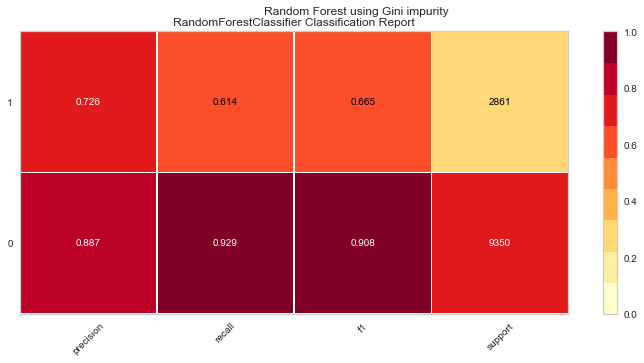

In [56]:
# Random Forests

fig = plt.figure(figsize = (10,5))
fig.suptitle(t="Random Forest using Gini impurity", y=1.0)
visRFGini = ClassificationReport(RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None, min_samples_split = 0.05, min_samples_leaf = 0.001), classes=["0", "1"], support=True)
visRFGini.fit(train_data, train_label)  # Fit the visualizer and the model
visRFGini.score(test_data, test_label)  # Evaluate the model on the test data
visRFGini.poof()  

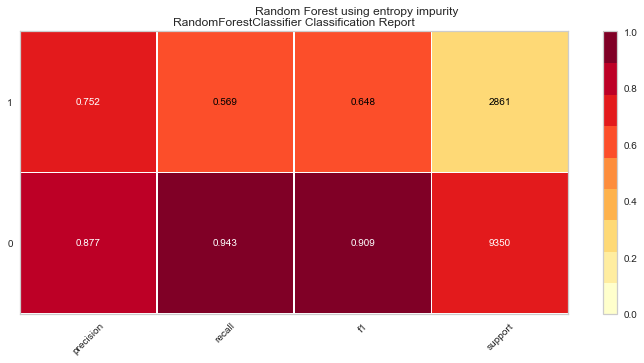

In [57]:
fig = plt.figure(figsize = (10,5))
fig.suptitle(t="Random Forest using entropy impurity", y=1.0)
visRFGini = ClassificationReport(RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001), classes=["0", "1"], support=True)
visRFGini.fit(train_data, train_label)  # Fit the visualizer and the model
visRFGini.score(test_data, test_label)  # Evaluate the model on the test data
visRFGini.poof() 

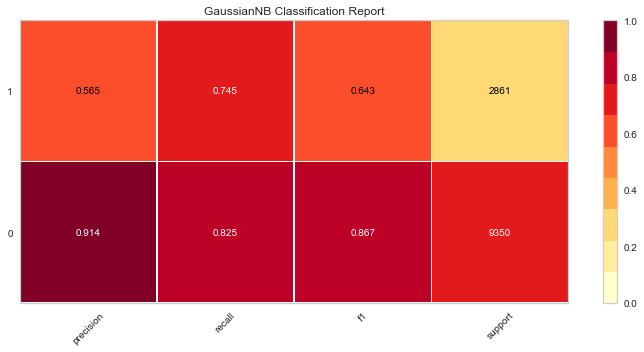

In [10]:
# Naïve Bayes

fig = plt.figure(figsize = (10,5))
visBayes = ClassificationReport(GaussianNB(), classes=["0", "1"], support=True)
visBayes.fit(train_data, train_label)  # Fit the visualizer and the model
visBayes.score(test_data, test_label)  # Evaluate the model on the test data
visBayes.poof()

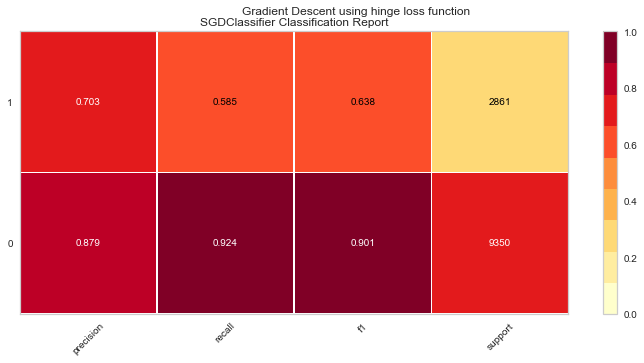

<Figure size 432x288 with 0 Axes>

In [58]:
# Stochastic Gradient Descent

fig2 = plt.figure(figsize = (10,5))
fig2.suptitle(t="Gradient Descent using hinge loss function", y=1.0)
visSGDh = ClassificationReport(SGDClassifier(penalty="l2", tol=1e-3, max_iter=100), classes=["0", "1"], support=True)
visSGDh.fit(train_data, train_label)  # Fit the visualizer and the model
visSGDh.score(test_data, test_label)  # Evaluate the model on the test data
visSGDh.poof()             
plt.draw()

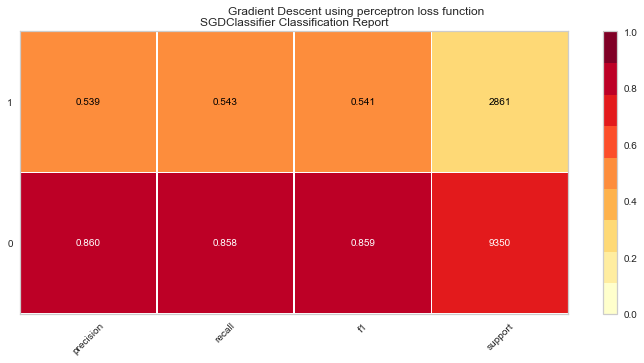

<Figure size 432x288 with 0 Axes>

In [59]:
fig3 = plt.figure(figsize = (10,5))
fig3.suptitle(t="Gradient Descent using perceptron loss function", y=1.0)
visSGDp = ClassificationReport(SGDClassifier(loss="perceptron", penalty="l2", tol=1e-3, max_iter=100), classes=["0", "1"], support=True)
visSGDp.fit(train_data, train_label)  # Fit the visualizer and the model
visSGDp.score(test_data, test_label)  # Evaluate the model on the test data
visSGDp.poof()             
plt.draw()

In [12]:
## EFFECT OF THE NUMBER OF FEATURES ON THE EFFICIENCY (this is computationaly intensive so I only did 2 examples)

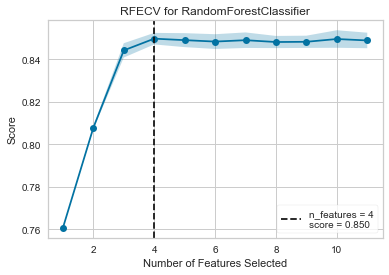

In [13]:
# Example 1: For Random Forest with Gini impurity

target = 'income'
features = [col for col in df_el.columns if col != target]

oz1= RFECV(RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None, min_samples_split = 0.05, min_samples_leaf = 0.001),cv=5)
X = df_el[features]
y = df_el[target]
oz1.fit(X, y)
oz1.poof()

In [14]:
col_array= np.asarray(features)
print("Feature Ranking: ")
for i in range (0, len(col_array)):
    print ( col_array[i],  oz1.ranking_[i])

Feature Ranking: 
age 2
capital_gain 1
capital_loss 1
hours_per_week 3
workclass 5
education 1
marital_status 1
occupation 4
race 8
sex 7
native_country 6


In [15]:
df_el_RFg_Red = df_el.drop(['race','sex','workclass', 'occupation', 'native_country', 'hours_per_week', 'age'],1)

In [40]:
train_data_RFg_Red, test_data_RFg_Red, train_label_RFg_Red, test_label_RFg_Red = train_test_split(df_el_RFg_Red.drop(['income'],1), df_el_RFg_Red.income, test_size  = 0.25)

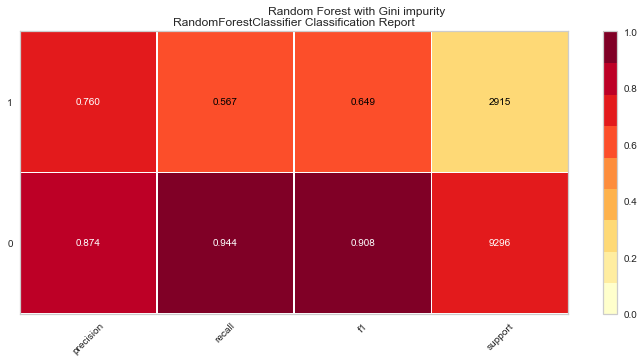

<Figure size 432x288 with 0 Axes>

In [60]:
fig4 = plt.figure(figsize = (10,5))
fig4.suptitle(t="Random Forest with Gini impurity", y=1.0)
visRFgR = ClassificationReport(RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None, min_samples_split = 0.05, min_samples_leaf = 0.001), classes=["0", "1"], support=True)
visRFgR.fit(train_data_RFg_Red, train_label_RFg_Red)  # Fit the visualizer and the model
visRFgR.score(test_data_RFg_Red, test_label_RFg_Red)  # Evaluate the model on the test data
visRFgR.poof()             
plt.draw()

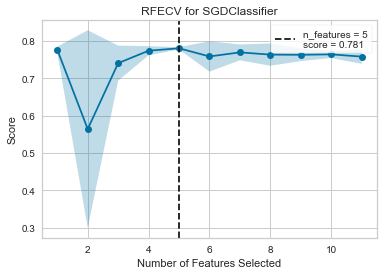

In [17]:
# Example 2: For Gradient Descent with perceptron loss

target = 'income'
features = [col for col in df_el.columns if col != target]

oz2 = RFECV(SGDClassifier(loss="perceptron", penalty="l2", tol= 1e-3, max_iter=500),cv=5)
X = df_el[features]
y = df_el[target]
oz2.fit(X, y)
oz2.poof()

In [18]:
col_array= np.asarray(features)
print("Feature Ranking: ")
for i in range (0, len(col_array)):
    print ( col_array[i],  oz2.ranking_[i])

Feature Ranking: 
age 6
capital_gain 1
capital_loss 1
hours_per_week 5
workclass 3
education 1
marital_status 1
occupation 7
race 1
sex 2
native_country 4


In [24]:
df_el_SGDp_Red = df_el.drop(['occupation','hours_per_week','native_country','age','workclass','sex'],1)

In [42]:
train_data_SGDp_Red, test_data_SGDp_Red, train_label_SGDp_Red, test_label_SGDp_Red = train_test_split(df_el_SGDp_Red.drop(['income'],1), df_el_SGDp_Red.income, test_size  = 0.25)

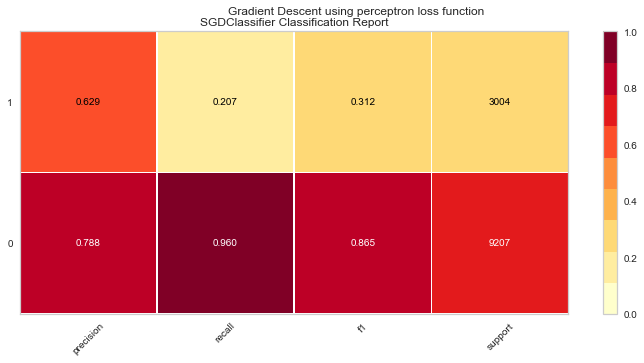

In [62]:
fig5 = plt.figure(figsize = (10,5))
fig5.suptitle(t="Gradient Descent using perceptron loss function", y=1.0)
visSGDpR = ClassificationReport(SGDClassifier(loss="perceptron", penalty="l2", tol=1e-3, max_iter=400), classes=["0", "1"], support=True)
visSGDpR.fit(train_data_SGDp_Red, train_label_SGDp_Red)  # Fit the visualizer and the model
visSGDpR.score(test_data_SGDp_Red, test_label_SGDp_Red)  # Evaluate the model on the test data
visSGDpR.poof()             

In [21]:
# Observation: Reducing the number of (label encoded) features 
# does not affect much the f1, but it reduces the complexity!